# General

In [34]:
import matplotlib.pyplot as plt
import random
import numpy as np

global plg, actual_turn

# definition of general parameters
max_turns = 9
max_turns = min(max_turns, 9)

# Logical Functions

In [35]:
# randomly returns a string with the starting player: 'user' or 'pc'
def starting_one():
    players = ['user', 'pc']
    return (players[random.randrange(0, 2)])

In [36]:
# returns true is the given coordinates match with an empty space in the playground
def empty_cell(x, y):
    return plg[2-y][x] == 0

def empty_cell_pc(x, y):
    return plg[x][y] == 0

In [37]:
# updates the variable plg filling the position (x,y) with or 1 or -1 
def update_plg_user(bin, x, y):
    plg[2-y][x] = bin
    
# updates the variable plg filling the position (x,y) with or 1 or -1
def update_plg_pc(bin, x, y):
    plg[x][y] = bin

In [38]:
# returns the name of the winner or an empty string if there is still no winner in the game
def who_wins():
    winner = ''
    plg_a = np.array(plg)
    
    if np.trace(plg_a) == 3 or np.trace(np.fliplr(plg_a)) == 3:  # checking the diagonals
        winner = 'user'
    elif np.trace(plg_a) == -3 or np.trace(np.fliplr(plg_a)) == -3:
        winner = 'pc'
    else:
        for i in range(3):
            if plg_a.sum(axis=1)[i] == 3 or plg_a.sum(axis=0)[i] == 3:  # before 'or': check X axis, after 'or': check Y axis)
                winner = 'user'
                break
            elif plg_a.sum(axis=1)[i] == -3 or plg_a.sum(axis=0)[i] == -3:
                winner = 'pc'
                break
            else:
                winner = ''

    return (winner)

In [39]:
# asks the user for the x,y coordinates of his/her move, checks if x,y are inside the playground and return them.
def user_move():
    options = ['1', '2', '3']
    choosen_x = ''
    choosen_y = ''
    while choosen_x not in options:
        # check if its an integer
        choosen_x = input("Indicate de X coordinate of your move (1,2,3)")
    while choosen_y not in options:
        # check if its an integer
        choosen_y = input("Indicate de Y coordinate of your move (1,2,3)")

    return (int(choosen_x) - 1), (int(choosen_y) - 1)

In [40]:
# This function does the pc strategic move (included the check for empty cells)
def pc_move():
    #attaking ->> looking for alignment of two '-1' and putting the third
    found = False
    plg_a = np.array(plg)
    
    if np.trace(plg_a) == -2:   # checking oportunity in diagonal
        found = True
        if plg[0][0] == 0:
            return 0, 0
        elif plg[1][1] == 0:
            return 1, 1
        else:
            return 2, 2
    elif np.trace(np.fliplr(plg_a))== -2:  # checking oportunity in other diagonal 
        found = True
        if plg[2][0] == 0:
            return 2, 0
        elif plg[1][1] == 0:
            return 1, 1
        else:
            return 0, 2
    else:
        for i in range(3):
            if plg_a.sum(axis=1)[i] == -2:  # checking opportunity in horitzontal (x3 rows)
                found = True
                if plg[i][0] == 0:
                    return i, 0
                    break
                elif plg[i][1] == 0:
                    return i, 1
                    break
                else: 
                    return i, 2
                    break
            elif plg_a.sum(axis=0)[i] == -2:  # checking opportunity in vertical (x3 columns)
                found = True
                if plg[0][i] == 0:
                    return 0, i
                    break
                elif plg[1][i] == 0:
                    return 1, i
                    break
                else:
                    return 2, i
                    break
    
    #defending ->> looking for alignment of two '1' and blocking the third
    if np.trace(plg_a) == 2:   # checking oportunity in diagonal
        found = True
        if plg[0][0] == 0:
            return 0, 0
        elif plg[1][1] == 0:
            return 1, 1
        else:
            return 2, 2
    elif np.trace(np.fliplr(plg_a))== 2:  # checking oportunity in other diagonal 
        found = True
        if plg[2][0] == 0:
            return 2, 0
        elif plg[1][1] == 0:
            return 1, 1
        else:
            return 0, 2
    else:
        for i in range(3):
            if plg_a.sum(axis=1)[i] == 2:  # checking opportunity in horitzontal (x3 rows)
                found = True
                if plg[i][0] == 0:
                    return i, 0
                    break
                elif plg[i][1] == 0:
                    return i, 1
                    break
                else: 
                    return i, 2
                    break
            elif plg_a.sum(axis=0)[i] == 2:  # checking opportunity in vertical (x3 columns)
                found = True
                if plg[0][i] == 0:
                    return 0, i
                    break
                elif plg[1][i] == 0:
                    return 1, i
                    break
                else:
                    return 2, i
                    break
    # There's no opportunity to win or block: RANDOM GAME
    if not found: 
        pc_x = random.randrange(0, 3)
        pc_y = random.randrange(0, 3)
        while not empty_cell_pc(pc_x, pc_y):
            pc_x = random.randrange(0, 3)
            pc_y = random.randrange(0, 3)
        return pc_x, pc_y

# Plot Functions

In [41]:
# generate and plot the playground
def plot_plg():
    v0 = [(0, 0), (0, 12)]
    v1 = [(4, 4), (0, 12)]
    v2 = [(8, 8), (0, 12)]
    v3 = [(12, 12), (0, 12)]
    h0 = [(0, 12), (0, 0)]
    h1 = [(0, 12), (4, 4)]
    h2 = [(0, 12), (8, 8)]
    h3 = [(0, 12), (12, 12)]

    plt.plot(v0[0], v0[1], v1[0], v1[1], v2[0], v2[1], v3[0], v3[1])
    plt.plot(h0[0], h0[1], h1[0], h1[1], h2[0], h2[1], h3[0], h3[1])

    for j in range(3):
        for k in range(3):
            yc = 10 - j * 4  # changing reference (from PLG indexes to PLOT coordinates) -->> DEFINING CENTER OF FIGURES
            xc = 2 + k * 4
            if plg[j][k] == 1:  # plot a 'cross' by a vert. and a horit. line from a given center (xc,yc)
                vl = [(xc, xc, xc), (yc - 1, yc, yc + 1)]
                hl = [(xc - 1, xc, xc + 1), (yc, yc, yc)]
                plt.plot(vl[0], vl[1], hl[0], hl[1])
            elif plg[j][k] == -1:  # plot a 'circle' by 4 lines from a given center (xc,yc)
                se = [(xc, xc + 1), (yc - 1, yc)]
                ne = [(xc, xc + 1), (yc + 1, yc)]
                no = [(xc, xc - 1), (yc + 1, yc)]
                so = [(xc, xc - 1), (yc - 1, yc)]
                plt.plot(se[0], se[1], ne[0], ne[1], no[0], no[1], so[0], so[1])

    # visualization
    #plt.axis('off')
    plt.xlabel('X:  1                2                 3', fontsize=16)
    plt.ylabel('Y:  1           2           3', fontsize=16)
    plt.xticks([])
    plt.yticks([])
    plt.box(on=None)
    print("PRESENT TABLETOP:")
    plt.show()

# Main Flow

PRESENT TABLETOP:


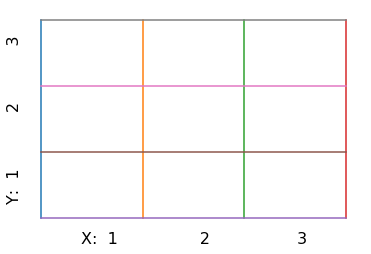

Indicate de X coordinate of your move (1,2,3)2
Indicate de Y coordinate of your move (1,2,3)2
PRESENT TABLETOP:


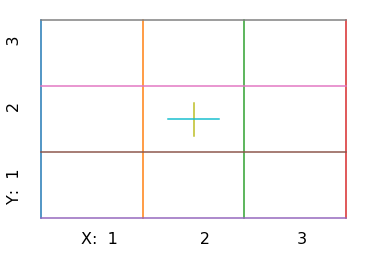

Remaining turns: 8
Winner: 
PRESENT TABLETOP:


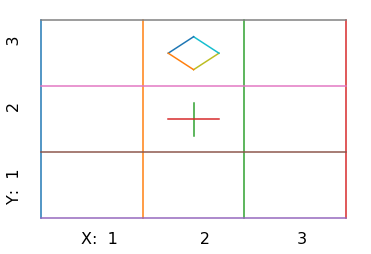

PC move was: (2,3)
Remaining turns: 7
Winner: 
Indicate de X coordinate of your move (1,2,3)3
Indicate de Y coordinate of your move (1,2,3)3
PRESENT TABLETOP:


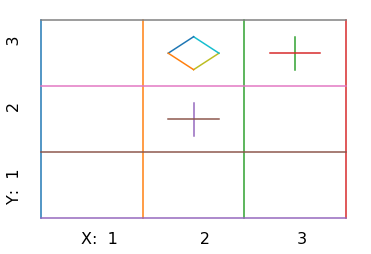

Remaining turns: 6
Winner: 
PRESENT TABLETOP:


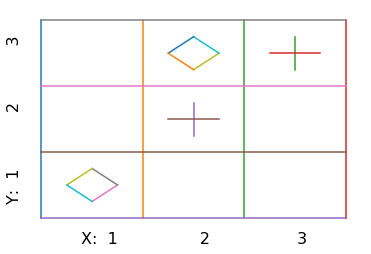

PC move was: (1,1)
Remaining turns: 5
Winner: 
Indicate de X coordinate of your move (1,2,3)3
Indicate de Y coordinate of your move (1,2,3)2
PRESENT TABLETOP:


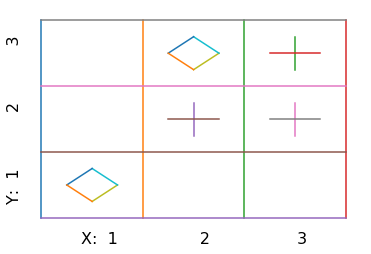

Remaining turns: 4
Winner: 
PRESENT TABLETOP:


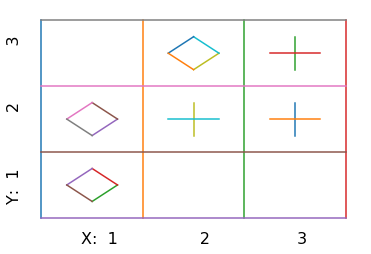

PC move was: (1,2)
Remaining turns: 3
Winner: 
Indicate de X coordinate of your move (1,2,3)3
Indicate de Y coordinate of your move (1,2,3)1
PRESENT TABLETOP:


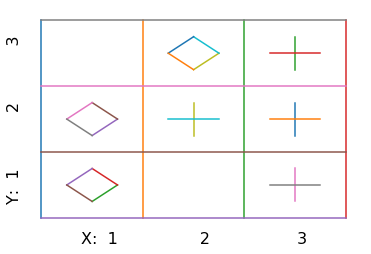

Remaining turns: 2
Winner: user
You have win...Congratulations 'Master of Strategy'!!!


In [46]:
# initialize turn 1 and empty playground
plg = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
actual_turn = 1
st_one = starting_one()
win = False

if st_one == 'user':
    plot_plg()
    # First turn for the user (randomly selected)(not checking a victory because it is impossible by now)
    user_x, user_y = user_move()
    while not empty_cell(user_x, user_y):
        print('The selected cell is already filled')
        user_x, user_y = user_move()

    update_plg_user(1, user_x, user_y)  # update the playground (plg matrix) placing a 1
    plot_plg()
    print(f'Remaining turns: {max_turns-actual_turn}')
    print(f'Winner: {who_wins()}')
    actual_turn += 1
    
    
    # 2nd to 8th turns or until a victory
    while actual_turn < max_turns and not win:
        # PC's TURN
        pc_x, pc_y = pc_move()
        update_plg_pc(-1, pc_x, pc_y)  # update the playground (plg matrix) placing a -1 
        plot_plg()
        print(f'PC move was: ({pc_y+1},{2-pc_x+1})')
        print(f'Remaining turns: {max_turns-actual_turn}')
        print(f'Winner: {who_wins()}')
        actual_turn += 1
        if who_wins() == 'pc':  # If pc wins with its move, the game ends.
            print("You have lost against Python...Try again!")
            win = True
        else:
            # USER'S TURN
            user_x, user_y = user_move()
            while not empty_cell(user_x, user_y):
                print('The selected cell is already filled')
                user_x, user_y = user_move()

            update_plg_user(1, user_x, user_y)  # update the playground (plg matrix) placing a 1
            plot_plg()
            print(f'Remaining turns: {max_turns-actual_turn}')
            print(f'Winner: {who_wins()}')
            actual_turn += 1
            if who_wins() == 'user':  # If pc wins with its move, the game ends.
                print("You have win...Congratulations 'Master of Strategy'!!!")
                win = True


elif st_one == 'pc':
    print("PC has started playing. Now it's your turn!")
    # First turn for the pc (randomly selected)(not checking a victory because it is impossible by now)
    pc_x, pc_y = pc_move()
    update_plg_pc(-1, pc_x, pc_y)  # update the playground (plg matrix) placing a -1 
    plot_plg()
    print(f'PC move was: ({pc_y+1},{2-pc_x+1})')
    print(f'Remaining turns: {max_turns-actual_turn}')
    print(f'Winner: {who_wins()}')
    actual_turn += 1
    
    # 2nd to 8th turns or until a victory
    while actual_turn < max_turns and not win:
        # USER'S TURN
        user_x, user_y = user_move()
        while not empty_cell(user_x, user_y):
            print('The selected cell is already filled')
            user_x, user_y = user_move()

        update_plg_user(1, user_x, user_y)  # update the playground (plg matrix) placing a 1
        plot_plg()
        print(f'Remaining turns: {max_turns-actual_turn}')
        print(f'Winner: {who_wins()}')
        actual_turn += 1
        if who_wins() == 'user':  # If pc wins with its move, the game ends.
            print("You have win...Congratulations 'Master of Strategy'!!!")
            win= True
        else:
            # PC's TURN
            pc_x, pc_y = pc_move()
            update_plg_pc(-1, pc_x, pc_y)  # update the playground (plg matrix) placing a -1 
            plot_plg()
            print(f'PC move was: ({pc_y+1},{2-pc_x+1})')
            print(f'Remaining turns: {max_turns-actual_turn}')
            print(f'Winner: {who_wins()}')
            actual_turn += 1
            if who_wins() == 'pc':  # If pc wins with its move, the game ends.
                print("You have lost against Python...Try again!")
                win = True

if not win:
    print("The game ended in a tie. Do you want to play again?")